In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"c:\Users\Dell\Desktop\research ppr\heart_disease.csv")

In [172]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [173]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

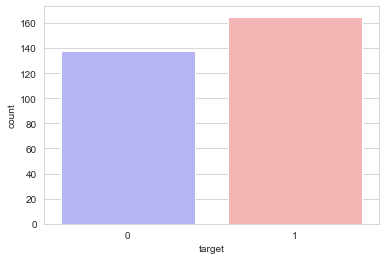

In [174]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [175]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print('')
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


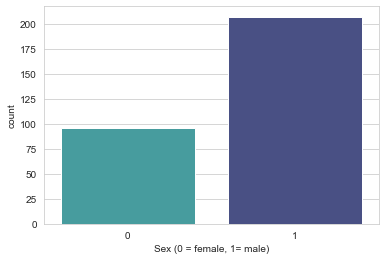

In [176]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

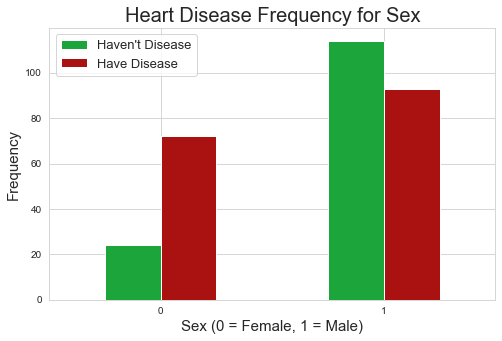

In [177]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,5),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex',fontsize=20)
plt.xlabel('Sex (0 = Female, 1 = Male)',fontsize=15)
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"],fontsize=13)
plt.ylabel('Frequency',fontsize=15)
plt.show()

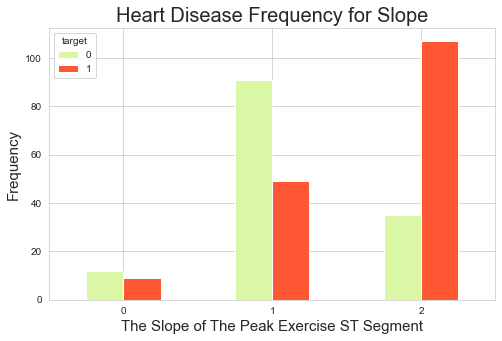

In [178]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(8,5),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope',fontsize=20)
plt.xlabel('The Slope of The Peak Exercise ST Segment',fontsize=15)
plt.xticks(rotation = 0)
plt.ylabel('Frequency',fontsize=15)
plt.show()

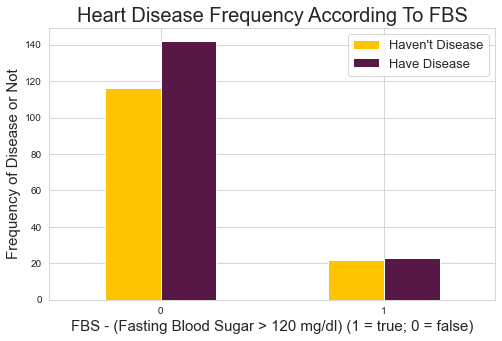

In [179]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(8,5),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS',fontsize=20)
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)',fontsize=15)
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"],fontsize=13)
plt.ylabel('Frequency of Disease or Not',fontsize=15)
plt.show()

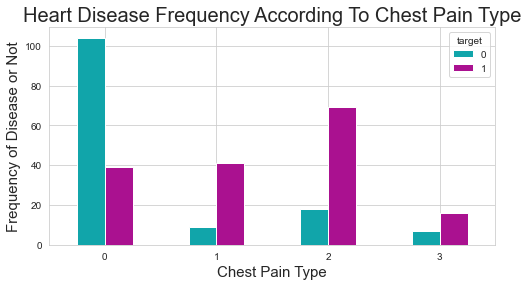

In [180]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(8,4),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type',fontsize=20)
plt.xlabel('Chest Pain Type',fontsize=15)
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not',fontsize=15)
plt.show()

In [181]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

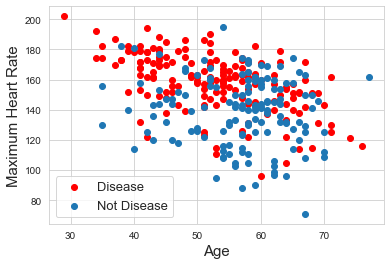

In [182]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"],fontsize=13)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Maximum Heart Rate",fontsize=15)
plt.show()

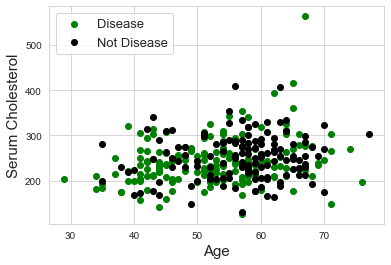

In [183]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c="black")
plt.legend(["Disease", "Not Disease"],fontsize=13)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Serum Cholesterol",fontsize=15)
plt.show()

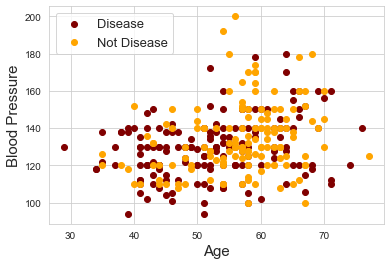

In [184]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="maroon")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c="orange")
plt.legend(["Disease", "Not Disease"],fontsize=13)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Blood Pressure",fontsize=15)
plt.show()


Accuracy for training set for Decision Tree = 1.0
Precision for Decision Tree = 0.7446808510638298
Accuracy for test set for Decision Tree = 0.7362637362637363


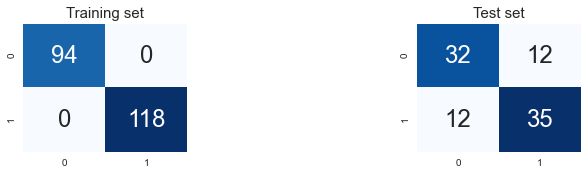

In [185]:
accuracies={}
precision={}
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= (cm_test[0][0] + cm_test[1][1])/len(y_test)
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))
precision['Decision Tree'] = p
accuracies['Decision Tree'] = acc
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Precision for Decision Tree = {}'.format(p))
print('Accuracy for test set for Decision Tree = {}'.format(acc))



Accuracy for training set for Naive Bayes = 0.8443396226415094
Precision for Naive Bayes = 0.7735849056603774
Accuracy for test set for Naive Bayes = 0.8021978021978022


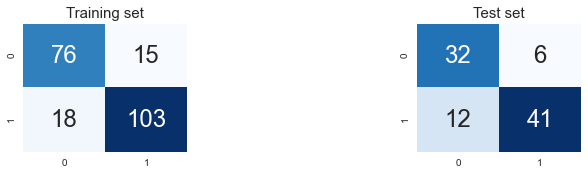

In [186]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc=(cm_test[0][0] + cm_test[1][1])/len(y_test)
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))
precision['Naive Bayes'] = p
accuracies['Naive Bayes'] = acc
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Precision for Naive Bayes = {}'.format(p))
print('Accuracy for test set for Naive Bayes = {}'.format(acc))



Accuracy for training set for Logistic Regression = 0.8632075471698113
Precision for Logistic Regression = 0.7962962962962963
Accuracy for test set for Logistic Regression = 0.8351648351648352


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


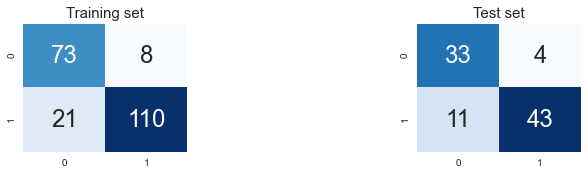

In [187]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc=((cm_test[0][0] + cm_test[1][1])/len(y_test))
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))
precision['Logistic Regression'] = p
accuracies['Logistic Regression'] = acc
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Precision for Logistic Regression = {}'.format(p))
print('Accuracy for test set for Logistic Regression = {}'.format(acc))

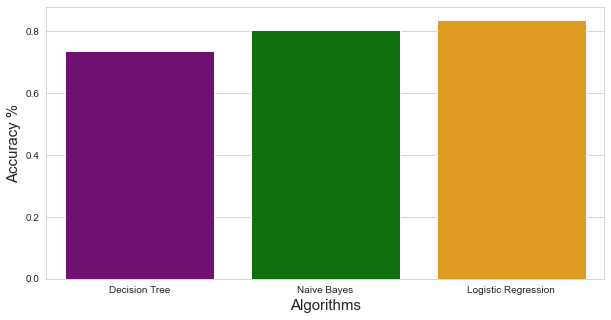

In [188]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1.0,0.2))
plt.ylabel("Accuracy %",fontsize=15)
plt.xlabel("Algorithms",fontsize=15)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

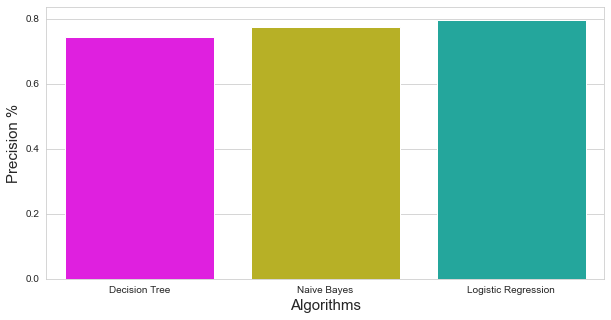

In [189]:
colors = ["magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1.0,0.2))
plt.ylabel("Precision %",fontsize=15)
plt.xlabel("Algorithms",fontsize=15)
sns.barplot(x=list(precision.keys()), y=list(precision.values()), palette=colors)
plt.show()

roc_auc_score for DecisionTree:  0.6904761904761906
roc_auc_score for Logistic Regression:  0.8576287657920311
roc_auc_score for Naive Bayes:  0.8323615160349854


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


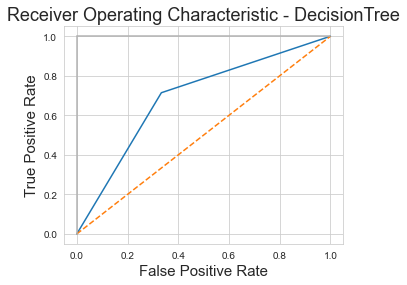

In [190]:
# loading libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Creating feature matrix and target vector
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creating classifier
clf_tree = DecisionTreeClassifier(); clf_reg = LogisticRegression(); clf_nb = GaussianNB()

# Training model
clf_tree.fit(X_train, y_train); clf_reg.fit(X_train, y_train); clf_nb.fit(X_train, y_train);

# Getting predicted probabilities
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]
y_score3 = clf_nb.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score3))

# Ploting ROC curves
plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - DecisionTree',fontsize=18)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()




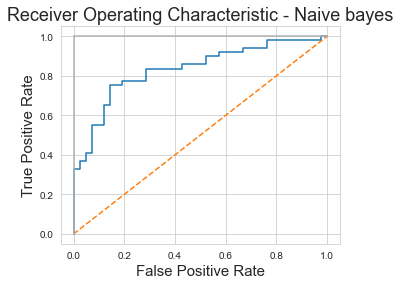

In [191]:

plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - Naive bayes',fontsize=18)
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()

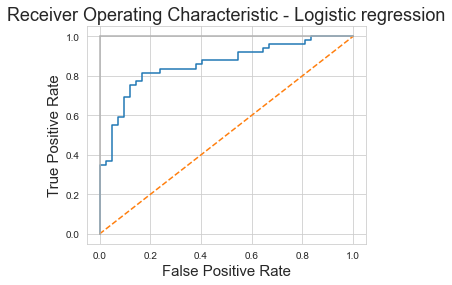

In [192]:
plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - Logistic regression',fontsize=18)
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()